# King County Housing Prices

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
#read in the data
df = pd.read_csv('kc_house_data_train.csv')

## Exploratory Data Analysis

In [3]:
#check for missing values
df.isna().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [5]:
#drop Unamed:0 and id
df.drop(columns = ['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [6]:
#change date to datetime
df['date'] = pd.to_datetime(df['date'])

#create month column
df['month'] = pd.DatetimeIndex(df['date']).month

#drop date column
df.drop(columns = ['date'], axis = 1, inplace = True)

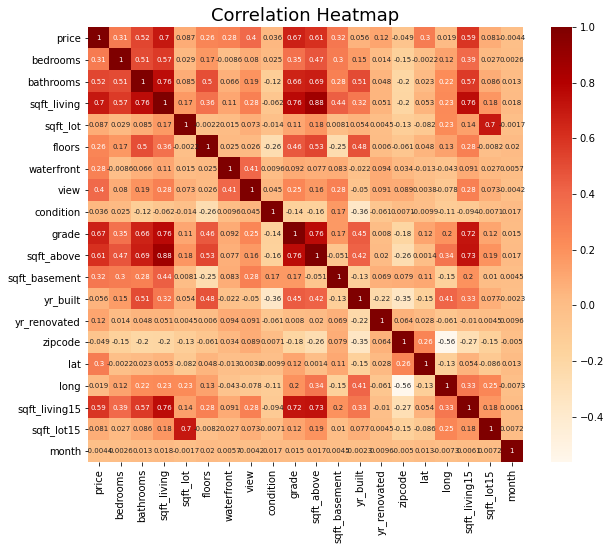

In [7]:
#Create Heatmap to look for correlations and multicollinearity
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), cmap = 'OrRd', annot = True, annot_kws={"size":7}, square = True)
plt.title('Correlation Heatmap', fontsize = 18);

In [8]:
#run corr between sqft_living and sqft_above, will drop if abaove 0.8
df['sqft_living'].corr(df['sqft_above'])

0.8766956918246035

In [9]:
#drop sqft_above
df.drop(columns = ['sqft_above'], axis = 1, inplace = True)

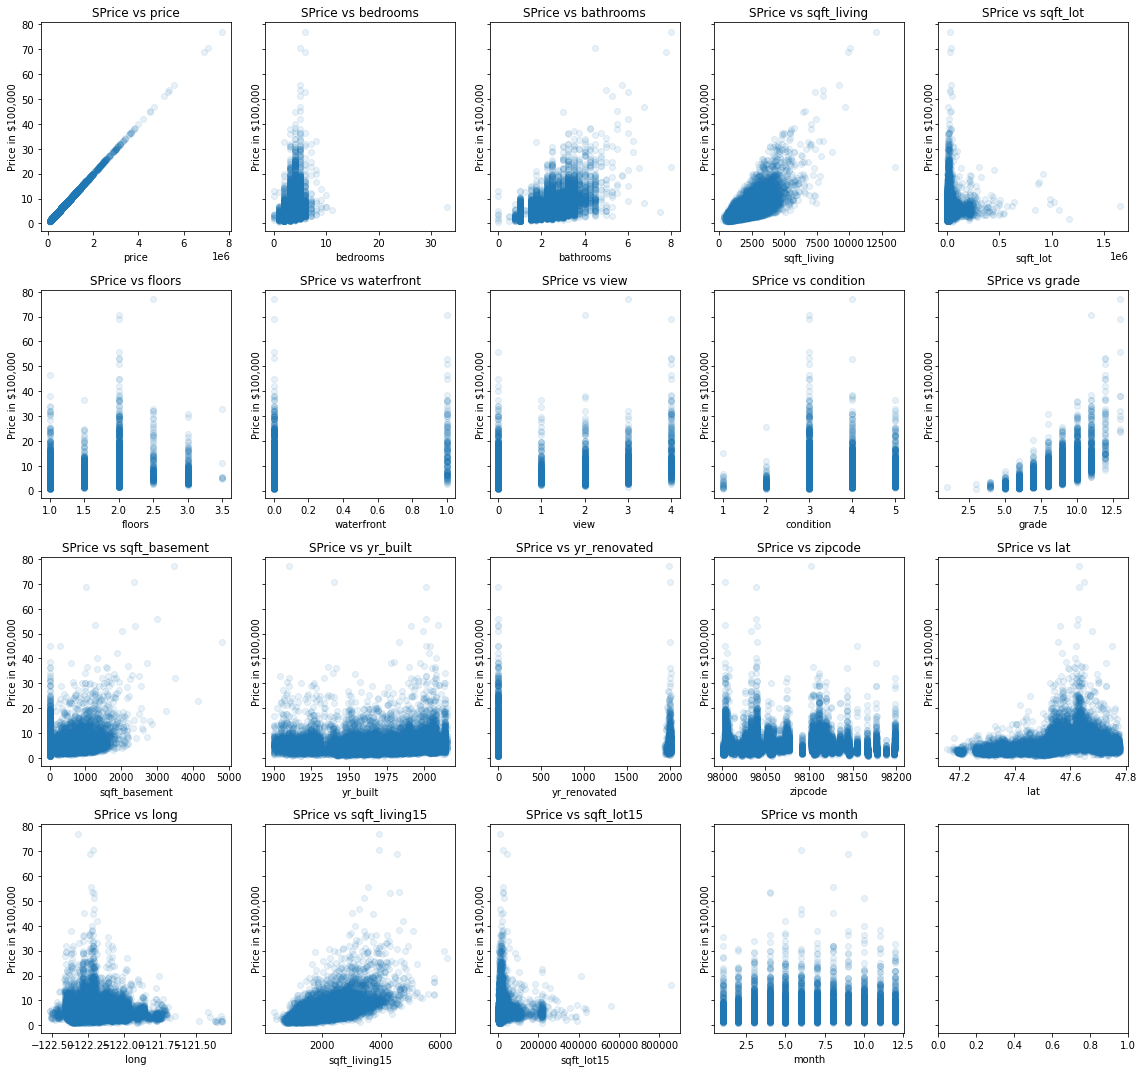

In [10]:
#scatter plots for factors and price
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'SPrice vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

## Data Prep

### Clean Data

**Bedroom**

In [11]:
df['bedrooms'].unique()

array([ 4,  5,  3,  2,  6,  1,  7,  0,  8, 11,  9, 10, 33])

In [12]:
#investigate 33 bedroom
df[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
8597,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,580,1947,0,98103,47.6878,-122.331,1330,4700,6


In [13]:
#compared mean of sqft_living for 3 bedrooms with sqft_living of 33 bedroom house
print(df[df['bedrooms'] == 3]['sqft_living'].mean())

#compared mean of sqft_lot for 3 bedrooms with sqft_lot of 33 bedroom house
print(df[df['bedrooms'] == 3]['sqft_lot'].mean())

1805.1852746693794
14263.571337741607


In [14]:
#only 1.75 bathrooms, sqft_living similar mean 3, and sqft_lot smaller than mean of 3
#change house with 33 bedrooms to 3 bedrooms
df['bedrooms'].replace(to_replace = 33, value = 3, inplace = True)

In [15]:
df[df['bedrooms'] == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
483,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,0,1990,0,98031,47.4095,-122.168,2520,8050,4
1120,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,0,1990,0,98102,47.6362,-122.322,2360,4000,6
2430,265000.0,0,0.75,384,213444,1.0,0,0,3,4,0,2003,0,98070,47.4177,-122.491,1920,224341,10
3032,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,0,1996,0,98065,47.5265,-121.828,1060,7200,12
3609,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,0,1985,0,98042,47.3473,-122.151,2500,8751,11
5424,380000.0,0,0.00,1470,979,3.0,0,2,3,8,0,2006,0,98133,47.7145,-122.356,1470,1399,2
6409,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,0,1999,0,98125,47.7222,-122.290,1430,1650,8
9286,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,0,1990,0,98053,47.6642,-122.069,4740,35061,6
10067,142000.0,0,0.00,290,20875,1.0,0,0,1,1,0,1963,0,98024,47.5308,-121.888,1620,22850,9
10074,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,0,2003,0,98038,47.3493,-122.053,1810,5685,9


**Sqft Living**

In [16]:
#look of house with large sqft_lot
df[df['sqft_lot'] > 1200000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
718,700000.0,4,1.0,1300,1651359,1.0,0,3,4,6,0,1920,0,98022,47.2313,-122.023,2560,425581,3


In [17]:
#cap at 1200000
df['sqft_lot']= np.where(df['sqft_lot'] > 1200000, 1200000, df['sqft_lot'])

### Categorical Data

**Waterfront**

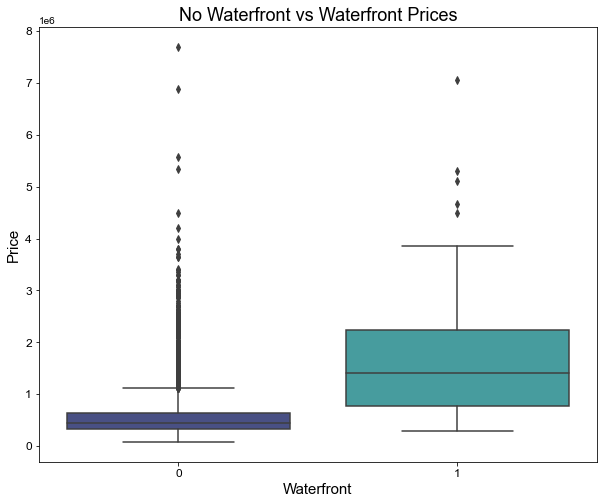

In [18]:
#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(10,8))
sns.set(style="darkgrid")
bx = sns.boxplot(x=df['waterfront'],y=df['price'], palette = 'mako')
bx.axes.set_title("No Waterfront vs Waterfront Prices",fontsize=18)
bx.set_xlabel("Waterfront",fontsize=15)
bx.set_ylabel("Price",fontsize=15)
bx.tick_params(labelsize=12)

In [19]:
#run stats test to see if difference, alpha = 0.05
#null: mu price for no_waterfront = mu price for waterfront
#alternative: mu price for no_waterfront != mu price for waterfront
no_waterfront = df[df['waterfront'] == 0]['price']
waterfront = df[df['waterfront'] == 1]['price']

stats.ttest_ind(no_waterfront, waterfront)
#p-value < 0.05 can reject null. There is statistical difference. 

Ttest_indResult(statistic=-37.72330429549608, pvalue=2.465038317654299e-299)

**Grade**

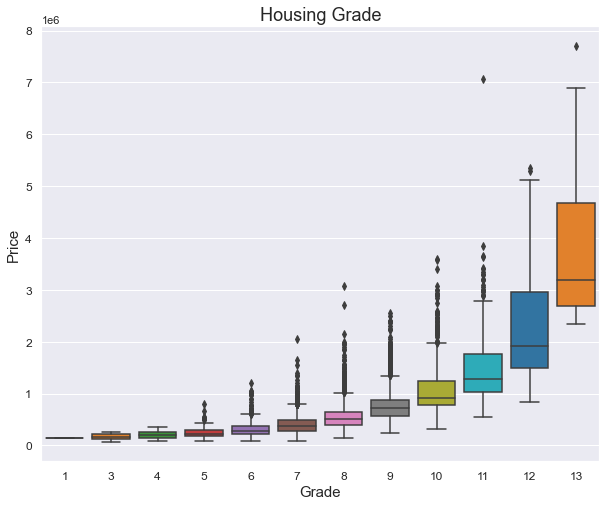

In [20]:
#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(10,8))
sns.set(style="darkgrid")
bx = sns.boxplot(x=df['grade'],y=df['price'], palette = 'tab10')
bx.axes.set_title("Housing Grade",fontsize=18)
bx.set_xlabel("Grade",fontsize=15)
bx.set_ylabel("Price",fontsize=15)
bx.tick_params(labelsize=12)

**Zip Code**

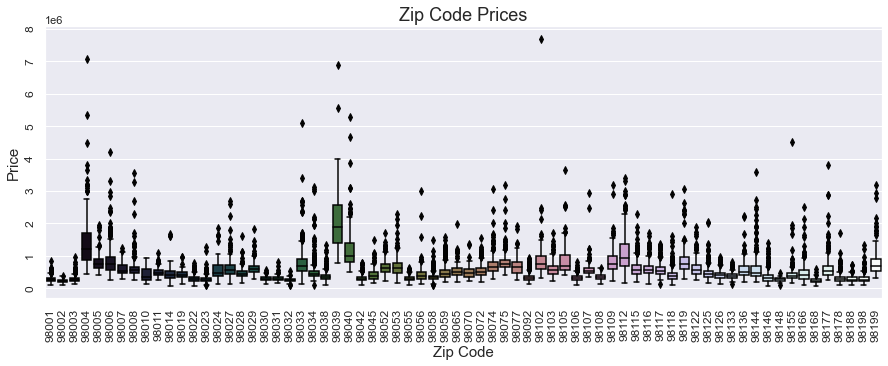

In [21]:
#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(15,5))
sns.set(style="darkgrid")
bx = sns.boxplot(x=df['zipcode'],y=df['price'], palette = 'cubehelix')
bx.axes.set_title("Zip Code Prices",fontsize=18)
bx.set_xlabel("Zip Code",fontsize=15)
bx.set_ylabel("Price",fontsize=15)
bx.tick_params(labelsize=12, rotation = 90)

**Create Dummy Variables**

In [22]:
waterfront_dummies = pd.get_dummies(df['waterfront'], prefix='water', drop_first=True)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)

price = df['price']

dfc = pd.concat([df, waterfront_dummies, grade_dummies, zipcode_dummies], 
                   axis=1)

In [23]:
dfc.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,water_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,0,1986,0,98058,47.4388,-122.162,2390,7700,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1070,1977,0,98115,47.6784,-122.285,2370,6283,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Feature Engineering

**Peak Month**

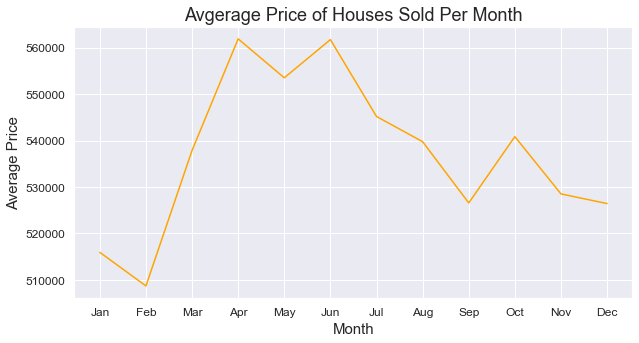

In [24]:
#graph looking at price and month
jan = dfc[dfc['month'] == 1]['price'].mean()
feb = dfc[dfc['month'] == 2]['price'].mean()
mar = dfc[dfc['month'] == 3]['price'].mean()
apr = dfc[dfc['month'] == 4]['price'].mean()
may = dfc[dfc['month'] == 5]['price'].mean()
jun = dfc[dfc['month'] == 6]['price'].mean()
jul = dfc[dfc['month'] == 7]['price'].mean()
aug = dfc[dfc['month'] == 8]['price'].mean()
sep = dfc[dfc['month'] == 9]['price'].mean()
octb = dfc[dfc['month'] == 10]['price'].mean()
nov = dfc[dfc['month'] == 11]['price'].mean()
dec = dfc[dfc['month'] == 12]['price'].mean()

fig,ax = plt.subplots(figsize = (10,5))
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = [jan, feb, mar, apr, may, jun, jul, aug, sep, octb, nov, dec]
ax.plot(x,y, color = 'orange')
ax.set_title('Avgerage Price of Houses Sold Per Month', fontsize = 18)
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Average Price', fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

In [25]:
#notice peak months April - June, create a peak month and no_peak months
no_peak = dfc[(dfc['month'] <= 3) | (dfc['month'] >= 7)]
peak = dfc[(dfc['month'] >=4) & (dfc['month'] <=6)]

In [26]:
#run ttest to see if statistical differences in price, alpha = 0.05
#null: mu price for no_peak = mu price for peak
#alternative: mu price for no_peak != mu price for peak
stats.ttest_ind(no_peak['price'], peak['price'])
#p-value < 0.05 can reject null. There is a statistical difference in prices

Ttest_indResult(statistic=-4.365731019900583, pvalue=1.2743404537531055e-05)

In [27]:
#create column for peak or no peak months
conditions = [((dfc['month'] <= 3) | (dfc['month'] >= 7)),
             ((dfc['month'] >=4) & (dfc['month'] <=6))]

choices = [('no_peak'), ('peak')]

dfc['peak_months'] = np.select(conditions, choices)

In [28]:
dfc.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,water_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,...,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,peak_months
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,0,1986,0,98058,47.4388,-122.162,2390,7700,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no_peak
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1070,1977,0,98115,47.6784,-122.285,2370,6283,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no_peak


In [29]:
#dummy peak_months
dfc = pd.get_dummies(dfc, columns=['peak_months'], drop_first=True)

In [30]:
dfc.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,water_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,...,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,peak_months_peak
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,0,1986,0,98058,47.4388,-122.162,2390,7700,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1070,1977,0,98115,47.6784,-122.285,2370,6283,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Yard Size**

In [31]:
#Create column with estimated yard size
dfc['yard'] = dfc['sqft_lot'] - (dfc['sqft_living']/dfc['floors'])

**Years Since Work Done on House**

In [32]:
conditions = [(dfc['yr_renovated'] == 0),
             (dfc['yr_renovated'] != 0)]

choices = [(2021 - dfc['yr_built']), 
          (2021 - dfc['yr_renovated'])]

dfc['yrs_since_work'] = np.select(conditions, choices) 

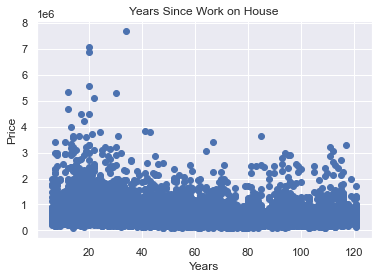

In [33]:
fig,ax = plt.subplots()
x = dfc['yrs_since_work']
y = dfc['price']
ax.scatter(x,y)
ax.set_title('Years Since Work on House')
ax.set_ylabel('Price')
ax.set_xlabel('Years');

**North vs South**

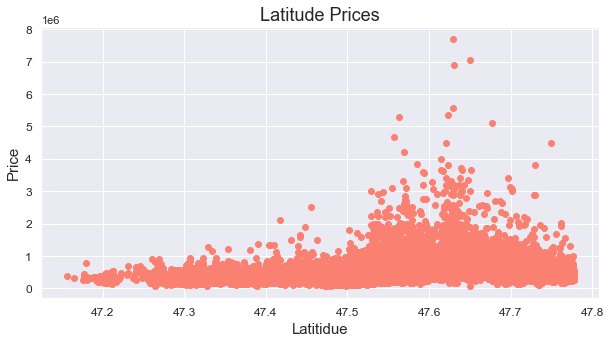

In [34]:
#Pull up scatter plot for latitude and price
fig,ax = plt.subplots(figsize = (10,5))
x = dfc['lat']
y = dfc['price']
ax.scatter(x,y, color = 'salmon')
ax.set_title('Latitude Prices', fontsize = 18)
ax.set_xlabel('Latitidue', fontsize = 15)
ax.set_ylabel('Price', fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

In [35]:
#Split into South and North categories and run stats test, alpha = 0.05
#null: mu south houses = mu north houses
#alternative: mu south houses != mu north houses
south = dfc[dfc['lat'] < 47.5]['price']
north = dfc[dfc['lat'] >= 47.5]['price']

stats.ttest_ind(north, south)
#p-value less than 0.05, can reject null. There is statistical difference

Ttest_indResult(statistic=52.36034891408036, pvalue=0.0)

In [36]:
#Engineer s_n column
conditions = [(dfc['lat'] < 47.5),
             (dfc['lat'] >= 47.5)]

choice = [('south'), ('north')]

dfc['s_n'] = np.select(conditions, choice)

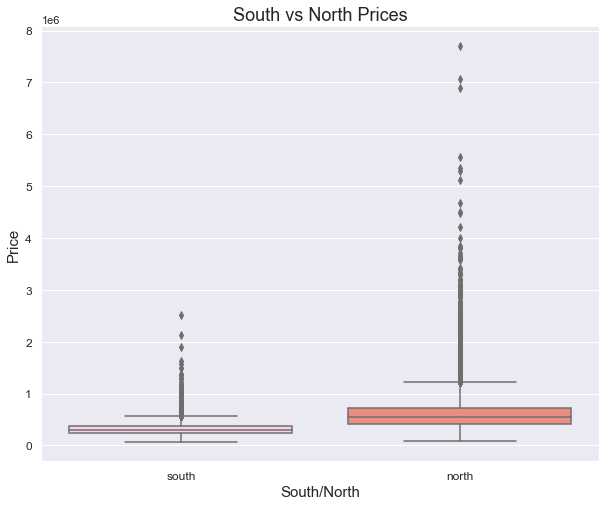

In [37]:
#Create boxplot
f, axes = plt.subplots(1, figsize=(10,8))
sns.set(style="darkgrid")
bx = sns.boxplot(x=dfc['s_n'],y=df['price'], palette = 'Set3_r')
bx.axes.set_title("South vs North Prices",fontsize=18)
bx.set_xlabel("South/North",fontsize=15)
bx.set_ylabel("Price",fontsize=15)
bx.tick_params(labelsize=12)

In [38]:
#dummy s_n
dfc = pd.get_dummies(dfc, columns=['s_n'], drop_first=True)

In [39]:
dfc.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,water_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,...,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,peak_months_peak,yard,yrs_since_work,s_n_south
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,0,1986,0,98058,47.4388,-122.162,2390,7700,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7858.0,35,1
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1070,1977,0,98115,47.6784,-122.285,2370,6283,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3830.0,44,0


In [40]:
#save dfc to csv
dfc.to_csv('dfc')

# Run Inference Model

In [41]:
outcome = 'price'
predictors = dfc.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=dfc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     880.9
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:12:00   Log-Likelihood:            -2.3070e+05
No. Observations:               17290   AIC:                         4.616e+05
Df Residuals:                   17189   BIC:                         4.624e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9787.1144   1004.288     -9.745      0.000   -1.18e+04   -7818.607
bedrooms         -1.206e+04   1709.836     -7.054      0.000   -1.54e+04   -8710.391
bathrooms         2.389e+04   2779.954      8.592      0.000    1.84e+04    2.93e+04
sqft_living        204.3706      4.651     43.939      0.000     195.254     213.488
sqft_lot           -66.3752      6.078    -10.921      0.000     -78.289     -54.462
floors           -8.461e+04   6022.048    -14.050      0.000   -9.64e+04   -7.28e+04
waterfront        3.256e+05   7272.123     44.771      0.000    3.11e+05     3.4e+05
view              5.163e+04   1833.576     28.160      0.000     4.8e+04    5.52e+04
condition         3.405e+04   2035.897     16.726      0.000    3.01e+04     3.8e+04
grade             5.848e+04   1.81e+04      3.225      0.001    2.29e+04     9.4e+04
sqft_basement      -34.1013      4.277     -7.973      0.000     -42.485     -25.717
yr_built          -783.8869    244.285     -3.209      0.001   -1262.709    -305.064
yr_renovated         9.3981      7.433      1.264      0.206      -5.171      23.967
zipcode           -344.0426     66.829     -5.148      0.000    -475.035    -213.050
lat               1.764e+05   6.91e+04      2.553      0.011     4.1e+04    3.12e+05
long             -2.202e+05   4.76e+04     -4.631      0.000   -3.13e+05   -1.27e+05
sqft_living15       17.8298      3.073      5.802      0.000      11.807      23.853
sqft_lot15          -0.0350      0.063     -0.557      0.577      -0.158       0.088
month            -2372.7944    395.050     -6.006      0.000   -3147.133   -1598.456
water_1           3.256e+05   7272.123     44.771      0.000    3.11e+05     3.4e+05
grade_3          -7.661e+04   1.58e+05     -0.485      0.628   -3.87e+05    2.33e+05
grade_4          -1.839e+05   1.03e+05     -1.777      0.076   -3.87e+05    1.89e+04
grade_5          -2.814e+05   8.12e+04     -3.467      0.001   -4.41e+05   -1.22e+05
grade_6          -3.414e+05   6.26e+04     -5.452      0.000   -4.64e+05   -2.19e+05
grade_7          -3.944e+05   4.47e+04     -8.818      0.000   -4.82e+05   -3.07e+05
grade_8          -4.254e+05   2.73e+04    -15.602      0.000   -4.79e+05   -3.72e+05
grade_9          -4.194e+05   1.19e+04    -35.267      0.000   -4.43e+05   -3.96e+05
grade_10         -3.574e+05   1.43e+04    -25.024      0.000   -3.85e+05   -3.29e+05
grade_11         -2.297e+05   3.07e+04     -7.479      0.000    -2.9e+05    -1.7e+05
grade_12          1.574e+05   4.97e+04      3.170      0.002    6.01e+04    2.55e+05
grade_13          1.341e+06   7.42e+04     18.075      0.000     1.2e+06    1.49e+06
zip_98002          1.85e+04   1.54e+04      1.204      0.229   -1.16e+04    4.86e+04
zip_98003        -1.486e+04   1.37e+04     -1.089      0.276   -4.16e+04    1.19e+04
zip_98004         7.186

# Check RMSE

In [42]:
# fit a model
#import the class
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm.fit(predictors, dfc['price'])

LinearRegression()

In [43]:
y_pred = lm.predict(predictors)

Text(0, 0.5, 'Predictions')

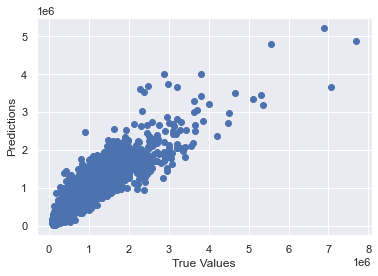

In [44]:
## The line / model
plt.scatter( dfc['price'], y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1]:
#give true value and predictions
mae = mean_absolute_error(dfc['price'], y_pred)
mse = mean_squared_error(dfc['price'], y_pred)
rmse = np.sqrt(mse)

print(mae)
print(rmse)

NameError: name 'mean_absolute_error' is not defined

***

# Evaluate Model

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

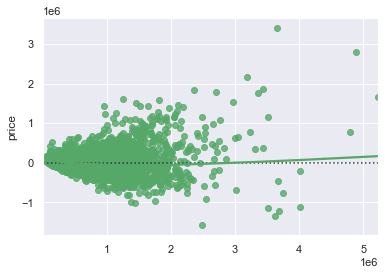

In [47]:
#Plot Residuals
sns.residplot(y_pred, dfc['price'], lowess=True, color="g")

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


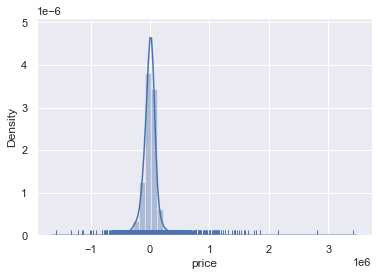

In [48]:
#Plot Residuals
residuals =  dfc['price']- y_pred
sns.distplot(residuals, kde=True, rug=True);


In [49]:
#Run Shapiro-Wilk test to test if normal distribustion, alpha = 0.05
#Null: residuals normally distributed
#Alternative: residuals are not normall distributed
stats.shapiro(residuals)

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7598166465759277, pvalue=0.0)

# Log Transformation

In [50]:
ldfc = pd.read_csv('dfc')
ldfc.drop('Unnamed: 0', axis = 1, inplace = True)

In [51]:
log_columns = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']

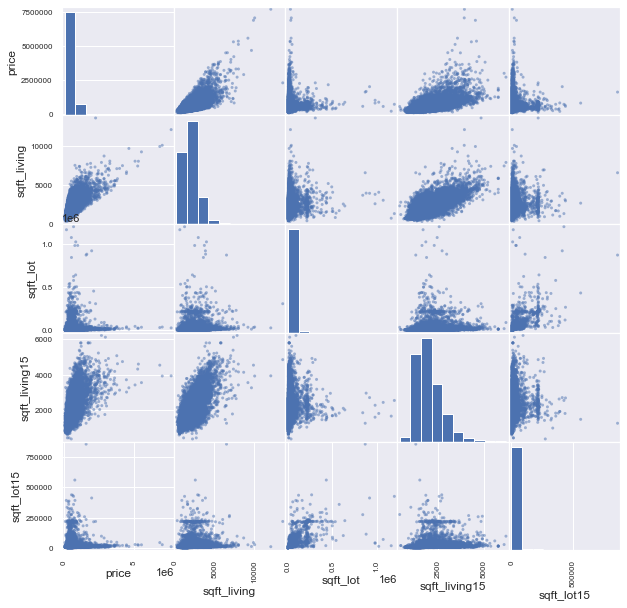

In [52]:
pd.plotting.scatter_matrix(ldfc[log_columns], figsize=(10,10));

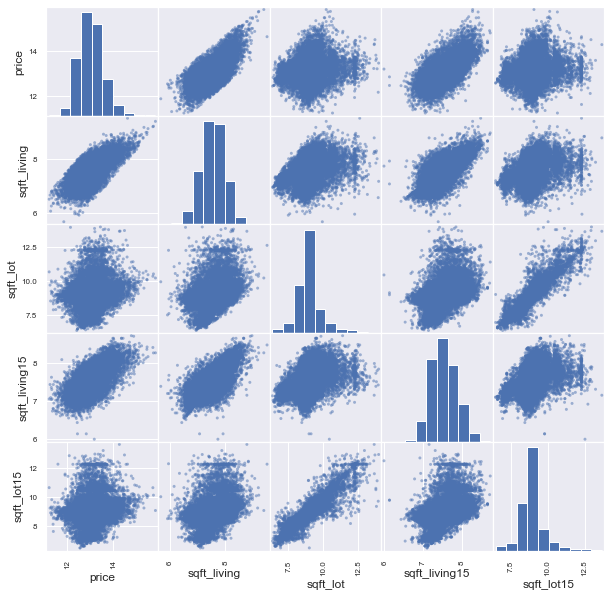

In [53]:
#no sqft_basemet since would give Nans

for feat in log_columns:
    ldfc[feat] = ldfc[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(ldfc[log_columns], figsize=(10,10));

In [54]:
l_outcome = 'price'
l_predictors = ldfc.drop(['price'], axis=1)
l_pred_sum = '+'.join(l_predictors.columns)
l_formula = l_outcome + '~' + l_pred_sum

l_model = ols(formula=l_formula, data=ldfc).fit()
l_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1359.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:12:26   Log-Likelihood:                 5448.3
No. Observations:               17290   AIC:                        -1.069e+04
Df Residuals:                   17189   BIC:                            -9911.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0234      0.001    -19.844      0.000      -0.026      -0.021
bedrooms            -0.0122      0.002     -6.003      0.000      -0.016      -0.008
bathrooms            0.0393      0.003     12.114      0.000       0.033       0.046
sqft_living          0.4402      0.008     52.887      0.000       0.424       0.457
sqft_lot             0.0649      0.005     14.045      0.000       0.056       0.074
floors              -0.0204      0.004     -4.930      0.000      -0.029      -0.012
waterfront           0.2421      0.009     28.434      0.000       0.225       0.259
view                 0.0593      0.002     27.677      0.000       0.055       0.064
condition            0.0564      0.002     23.643      0.000       0.052       0.061
grade                0.0412      0.021      1.938      0.053      -0.000       0.083
sqft_basement    -7.053e-05    4.5e-06    -15.684      0.000   -7.93e-05   -6.17e-05
yr_built            -0.0009      0.000     -2.986      0.003      -0.001      -0.000
yr_renovated      1.813e-05    8.7e-06      2.084      0.037    1.08e-06    3.52e-05
zipcode             -0.0005   7.86e-05     -6.759      0.000      -0.001      -0.000
lat                  0.2288      0.081      2.829      0.005       0.070       0.387
long                -0.4126      0.056     -7.369      0.000      -0.522      -0.303
sqft_living15        0.1484      0.007     19.998      0.000       0.134       0.163
sqft_lot15          -0.0143      0.004     -3.252      0.001      -0.023      -0.006
month               -0.0041      0.000     -8.804      0.000      -0.005      -0.003
water_1              0.2421      0.009     28.434      0.000       0.225       0.259
grade_3             -0.2001      0.185     -1.081      0.280      -0.563       0.163
grade_4             -0.1745      0.121     -1.441      0.150      -0.412       0.063
grade_5             -0.2470      0.095     -2.600      0.009      -0.433      -0.061
grade_6             -0.2280      0.073     -3.110      0.002      -0.372      -0.084
grade_7             -0.2091      0.052     -3.997      0.000      -0.312      -0.107
grade_8             -0.1662      0.032     -5.232      0.000      -0.228      -0.104
grade_9             -0.0905      0.014     -6.571      0.000      -0.118      -0.064
grade_10            -0.0360      0.017     -2.162      0.031      -0.069      -0.003
grade_11             0.0333      0.036      0.925      0.355      -0.037       0.104
grade_12             0.1323      0.058      2.278      0.023       0.018       0.246
grade_13             0.3996      0.087      4.612      0.000       0.230       0.569
zip_98002            0.0144      0.018      0.799      0.424      -0.021       0.050
zip_98003           -0.0068      0.016     -0.426      0.670      -0.038       0.025
zip_98004            0.

In [55]:
#instantiate a linear regression object
lm_l = LinearRegression()

#fit the linear regression to the data
lm_l.fit(l_predictors, ldfc['price'])

LinearRegression()

In [56]:
y_pred_l = lm_l.predict(l_predictors)

In [57]:
pred_exp = np.exp(y_pred_l)

In [58]:
#give true value and predictions
l_mae = mean_absolute_error(dfc['price'], pred_exp)
l_mse = mean_squared_error(dfc['price'], pred_exp)
l_rmse = np.sqrt(l_mse)

print(l_mae)
print(l_rmse)

71753.10878294308
126727.60739802243


In [59]:
l_residuals = abs(dfc['price'] - pred_exp)

<AxesSubplot:>

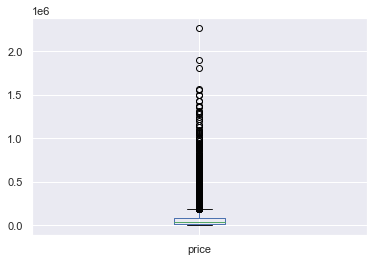

In [60]:
l_residuals.plot.box()

In [61]:
l_residuals.sort_values(ascending=False)

16814    2.272579e+06
1020     1.902659e+06
10366    1.813890e+06
5124     1.569871e+06
14477    1.556122e+06
             ...     
3461     1.151072e+01
2173     1.072117e+01
5355     8.421360e+00
2271     5.774015e+00
10067    4.152011e-06
Name: price, Length: 17290, dtype: float64

In [62]:
dfc.iloc[[16814, 1020, 10366, 5124, 14477]]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,water_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,...,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,peak_months_peak,yard,yrs_since_work,s_n_south
16814,4208000.0,5,6.00,7440,21540,2.0,0,0,3,12,1890,2003,0,98006,47.5692,-122.189,4740,19329,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17820.0,18,0
1020,3640900.0,4,3.25,4830,22257,2.0,1,4,4,11,0,1990,0,98039,47.6409,-122.241,3820,25582,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19842.0,31,0
10366,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,3480,1910,1987,98102,47.6298,-122.323,3940,8800,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22780.0,34,0
5124,2850000.0,4,4.00,5040,17208,1.0,0,0,5,10,2170,1976,0,98006,47.5701,-122.188,4050,18647,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12168.0,45,0
14477,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,0,2001,0,98004,47.6208,-122.219,3720,14592,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24302.0,20,0


In [63]:
dfc['sqft_lot'].describe()

count    1.729000e+04
mean     1.521729e+04
std      4.142507e+04
min      5.720000e+02
25%      5.081250e+03
50%      7.642000e+03
75%      1.072575e+04
max      1.200000e+06
Name: sqft_lot, dtype: float64

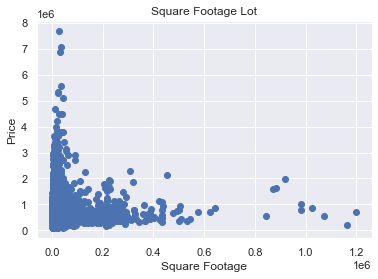

In [64]:
fig,ax = plt.subplots()
x = dfc['sqft_lot']
y = dfc['price']
ax.scatter(x,y)
ax.set_title('Square Footage Lot')
ax.set_xlabel('Square Footage')
ax.set_ylabel('Price');

In [65]:
#re-cap square footage
ldfc2 = pd.read_csv('dfc')
ldfc2['sqft_lot']= np.where(ldfc2['sqft_lot'] > 800000, 800000, ldfc2['sqft_lot'])

In [66]:
#re-log 
for feat in log_columns:
    ldfc2[feat] = ldfc2[feat].map(lambda x: np.log(x))

In [67]:
l2_outcome = 'price'
l2_predictors = ldfc2.drop(['price'], axis=1)
l2_pred_sum = '+'.join(l2_predictors.columns)
l2_formula = l2_outcome + '~' + l2_pred_sum

l2_model = ols(formula=l2_formula, data=ldfc2).fit()
l2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1359.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:12:28   Log-Likelihood:                 5448.6
No. Observations:               17290   AIC:                        -1.070e+04
Df Residuals:                   17189   BIC:                            -9912.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0234      0.001    -19.842      0.000      -0.026      -0.021
bedrooms            -0.0122      0.002     -5.995      0.000      -0.016      -0.008
bathrooms            0.0393      0.003     12.111      0.000       0.033       0.046
sqft_living          0.4402      0.008     52.901      0.000       0.424       0.457
sqft_lot             0.0647      0.005     14.065      0.000       0.056       0.074
floors              -0.0205      0.004     -4.952      0.000      -0.029      -0.012
waterfront           0.2421      0.009     28.440      0.000       0.225       0.259
view                 0.0593      0.002     27.677      0.000       0.055       0.064
condition            0.0564      0.002     23.645      0.000       0.052       0.061
grade                0.0411      0.021      1.936      0.053      -0.001       0.083
sqft_basement    -7.057e-05    4.5e-06    -15.693      0.000   -7.94e-05   -6.18e-05
yr_built            -0.0009      0.000     -2.988      0.003      -0.001      -0.000
yr_renovated      1.815e-05    8.7e-06      2.085      0.037    1.09e-06    3.52e-05
zipcode             -0.0005   7.86e-05     -6.759      0.000      -0.001      -0.000
lat                  0.2287      0.081      2.828      0.005       0.070       0.387
long                -0.4127      0.056     -7.370      0.000      -0.522      -0.303
sqft_living15        0.1485      0.007     20.011      0.000       0.134       0.163
sqft_lot15          -0.0145      0.004     -3.278      0.001      -0.023      -0.006
month               -0.0041      0.000     -8.807      0.000      -0.005      -0.003
water_1              0.2421      0.009     28.440      0.000       0.225       0.259
grade_3             -0.2003      0.185     -1.082      0.279      -0.563       0.163
grade_4             -0.1749      0.121     -1.444      0.149      -0.412       0.063
grade_5             -0.2472      0.095     -2.602      0.009      -0.433      -0.061
grade_6             -0.2282      0.073     -3.113      0.002      -0.372      -0.085
grade_7             -0.2092      0.052     -4.001      0.000      -0.312      -0.107
grade_8             -0.1663      0.032     -5.236      0.000      -0.229      -0.104
grade_9             -0.0906      0.014     -6.576      0.000      -0.118      -0.064
grade_10            -0.0360      0.017     -2.160      0.031      -0.069      -0.003
grade_11             0.0333      0.036      0.927      0.354      -0.037       0.104
grade_12             0.1324      0.058      2.280      0.023       0.019       0.246
grade_13             0.3998      0.087      4.615      0.000       0.230       0.570
zip_98002            0.0144      0.018      0.797      0.426      -0.021       0.050
zip_98003           -0.0068      0.016     -0.427      0.670      -0.038       0.025
zip_98004            0.

In [68]:
#instantiate a linear regression object
lm_l2 = LinearRegression()

#fit the linear regression to the data
lm_l2.fit(l2_predictors, ldfc2['price'])

y_pred_l2 = lm_l2.predict(l2_predictors)

pred_exp2 = np.exp(y_pred_l2)

#give true value and predictions
l2_mae = mean_absolute_error(dfc['price'], pred_exp2)
l2_mse = mean_squared_error(dfc['price'], pred_exp2)
l2_rmse = np.sqrt(l2_mse)

print(l2_mae)
print(l2_rmse)

71755.47941611514
126753.92509647935


In [69]:
#RMSE increase from our 126727.60739802243
#disregard change

***

***